# Advanced Programming VU -- Project 1 - Data Science

 ## 1) Import data from Kaggle and Setting directory

In [7]:
import kaggle

In [8]:
import os


In [11]:
%cd data

C:\Users\Jakob\Desktop\SoSe 2023\VU Advanced Programming Techniques\Portfolio\14hinum\Topic1_Data Science\data


In [4]:
%mkdir Spaceship

In [12]:
%cd Spaceship

C:\Users\Jakob\Desktop\SoSe 2023\VU Advanced Programming Techniques\Portfolio\14hinum\Topic1_Data Science\data\Spaceship


In [180]:
current_directory = os.getcwd()
print("Current directory:", current_directory)


Current directory: C:\Users\Jakob\Desktop\SoSe 2023\VU Advanced Programming Techniques\Portfolio\14hinum\Topic1_Data Science\data\Spaceship


In [181]:
! kaggle competitions download -c spaceship-titanic

spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [741]:
import pandas as pd
import numpy as np
import sklearn


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

import plotly.express as px
import matplotlib.pyplot as plt

import seaborn as sns

## 2) Description of the project/challenge and loading data

### Spaceship Titanic
#### Predict which passengers are transported to an alternate dimension

Kaggle info: In this competition the task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic"s collision with the spacetime anomaly. To help you make these predictions, you"re given a set of personal records recovered from the ship"s damaged computer system.



In [758]:
# load the train-data which are personal records for about two thirds (~8700) of the passengers and which can be used as training for ML approaches but
# for exploartory data analysis as well

## load the dataset via read_csv from pandas
train_data_space=pd.read_csv("train.csv")
## see the first 5 entries
train_data_space.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [759]:
##look at the size of the dataset 
train_data_space.shape

(8693, 14)

 ## 3) Preparation of the data sets

### Getting info of data

In [760]:
# First get some infos about the traindata  set
train_data_space.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [761]:
# List the categorical variables --> objects

print("Categories traindata:")
for col in train_data_space.select_dtypes(include=["object"]).columns:
    print(col)
print("\n")

Categories traindata:
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name




In [762]:
# List the numerical variables --> float64

print("Numerical variables traindata:")
for col in train_data_space.select_dtypes(include=["float64"]).columns:
    print(col)
print("\n")



Numerical variables traindata:
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck




In [763]:
# List the boolean variables --> bool
print("Boolean variables traindata:")
for col in train_data_space.select_dtypes(include=["bool"]).columns:
    print(col)




Boolean variables traindata:
Transported


### Taking some parsing steps in the test and the traindata

#### Parising of the PassengerID

Since the passengerID is built up of two number groups, it is recommended to split up the column into two passengerid columns and convert to floats

In [764]:
train_data_space.insert(0, "Passengerid_2", train_data_space["PassengerId"].apply(lambda x: x.split("_")[-1] if type(x) == str else np.nan))
train_data_space.insert(0, "Passengerid_1", train_data_space["PassengerId"].apply(lambda x: x.split("_")[-2] if type(x) == str else np.nan))
train_data_space = train_data_space.drop(columns="PassengerId")

train_data_space.head()

Passengerid_1 Passengerid_2 HomePlanet CryoSleep  Cabin  Destination   Age  \
0          0001            01     Europa     False  B/0/P  TRAPPIST-1e  39.0   
1          0002            01      Earth     False  F/0/S  TRAPPIST-1e  24.0   
2          0003            01     Europa     False  A/0/S  TRAPPIST-1e  58.0   
3          0003            02     Europa     False  A/0/S  TRAPPIST-1e  33.0   
4          0004            01      Earth     False  F/1/S  TRAPPIST-1e  16.0   

     VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0  False          0.0        0.0           0.0     0.0     0.0   
1  False        109.0        9.0          25.0   549.0    44.0   
2   True         43.0     3576.0           0.0  6715.0    49.0   
3  False          0.0     1283.0         371.0  3329.0   193.0   
4  False        303.0       70.0         151.0   565.0     2.0   

                Name  Transported  
0    Maham Ofracculy        False  
1       Juanna Vines         True  
2      Altark Susent        False  
3       Solam Susent        False  
4  Willy Santantines         True

In [765]:
train_data_space.Passengerid_1=train_data_space.Passengerid_1.astype(float)
train_data_space.Passengerid_2=train_data_space.Passengerid_2.astype(float)
train_data_space.head()



Passengerid_1  Passengerid_2 HomePlanet CryoSleep  Cabin  Destination  \
0            1.0            1.0     Europa     False  B/0/P  TRAPPIST-1e   
1            2.0            1.0      Earth     False  F/0/S  TRAPPIST-1e   
2            3.0            1.0     Europa     False  A/0/S  TRAPPIST-1e   
3            3.0            2.0     Europa     False  A/0/S  TRAPPIST-1e   
4            4.0            1.0      Earth     False  F/1/S  TRAPPIST-1e   

    Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0  39.0  False          0.0        0.0           0.0     0.0     0.0   
1  24.0  False        109.0        9.0          25.0   549.0    44.0   
2  58.0   True         43.0     3576.0           0.0  6715.0    49.0   
3  33.0  False          0.0     1283.0         371.0  3329.0   193.0   
4  16.0  False        303.0       70.0         151.0   565.0     2.0   

                Name  Transported  
0    Maham Ofracculy        False  
1       Juanna Vines         True  
2      Altark Susent        False  
3       Solam Susent        False  
4  Willy Santantines         True

#### Parising of the Cabin

Since the Cabin contains 3 different infos as different side,   it is recommended to split up the column into three for every caabin mark. One has to make sure that the nans are considered correctly

In [766]:

cabin_index = train_data_space .columns.tolist().index("Cabin")  

new_columns = ["Side", "Number", "Deck"]
for i, col in enumerate(new_columns):
    train_data_space .insert(loc=cabin_index, column=col, value=train_data_space ["Cabin"].apply(lambda x: x.split("/")[-i-1] if isinstance(x, str) else np.nan))

train_data_space = train_data_space.drop(columns="Cabin")

train_data_space.head()


Passengerid_1  Passengerid_2 HomePlanet CryoSleep Deck Number Side  \
0            1.0            1.0     Europa     False    B      0    P   
1            2.0            1.0      Earth     False    F      0    S   
2            3.0            1.0     Europa     False    A      0    S   
3            3.0            2.0     Europa     False    A      0    S   
4            4.0            1.0      Earth     False    F      1    S   

   Destination   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0  TRAPPIST-1e  39.0  False          0.0        0.0           0.0     0.0   
1  TRAPPIST-1e  24.0  False        109.0        9.0          25.0   549.0   
2  TRAPPIST-1e  58.0   True         43.0     3576.0           0.0  6715.0   
3  TRAPPIST-1e  33.0  False          0.0     1283.0         371.0  3329.0   
4  TRAPPIST-1e  16.0  False        303.0       70.0         151.0   565.0   

   VRDeck               Name  Transported  
0     0.0    Maham Ofracculy        False  
1    44.0       Juanna Vines         True  
2    49.0      Altark Susent        False  
3   193.0       Solam Susent        False  
4     2.0  Willy Santantines         True

#### Parising of the Names

Since the Family names and the first names are in a column it makes also sense to parse them into two seperate columns

In [767]:
name_index = train_data_space.columns.tolist().index("Name")  

new_columns = ["Family Name", "First Name"]
for i, col in enumerate(new_columns):
    train_data_space .insert(loc=name_index, column=col, value=train_data_space ["Name"].apply(lambda x: x.split(" ")[-i-1] if isinstance(x, str) else np.nan))

train_data_space = train_data_space.drop(columns="Name")

train_data_space.head()

Passengerid_1  Passengerid_2 HomePlanet CryoSleep Deck Number Side  \
0            1.0            1.0     Europa     False    B      0    P   
1            2.0            1.0      Earth     False    F      0    S   
2            3.0            1.0     Europa     False    A      0    S   
3            3.0            2.0     Europa     False    A      0    S   
4            4.0            1.0      Earth     False    F      1    S   

   Destination   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0  TRAPPIST-1e  39.0  False          0.0        0.0           0.0     0.0   
1  TRAPPIST-1e  24.0  False        109.0        9.0          25.0   549.0   
2  TRAPPIST-1e  58.0   True         43.0     3576.0           0.0  6715.0   
3  TRAPPIST-1e  33.0  False          0.0     1283.0         371.0  3329.0   
4  TRAPPIST-1e  16.0  False        303.0       70.0         151.0   565.0   

   VRDeck First Name  Family Name  Transported  
0     0.0      Maham    Ofracculy        False  
1    44.0     Juanna        Vines         True  
2    49.0     Altark       Susent        False  
3   193.0      Solam       Susent        False  
4     2.0      Willy  Santantines         True

### Changing data types 
Finally the CryoSleep and VIP and transporeted column types are changed 


In [768]:
train_data_space.CryoSleep=train_data_space.CryoSleep.astype(bool)
train_data_space.VIP=train_data_space.VIP.astype(bool)
train_data_space.Transported=train_data_space.Transported.astype(bool)
train_data_space.head()

Passengerid_1  Passengerid_2 HomePlanet  CryoSleep Deck Number Side  \
0            1.0            1.0     Europa      False    B      0    P   
1            2.0            1.0      Earth      False    F      0    S   
2            3.0            1.0     Europa      False    A      0    S   
3            3.0            2.0     Europa      False    A      0    S   
4            4.0            1.0      Earth      False    F      1    S   

   Destination   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0  TRAPPIST-1e  39.0  False          0.0        0.0           0.0     0.0   
1  TRAPPIST-1e  24.0  False        109.0        9.0          25.0   549.0   
2  TRAPPIST-1e  58.0   True         43.0     3576.0           0.0  6715.0   
3  TRAPPIST-1e  33.0  False          0.0     1283.0         371.0  3329.0   
4  TRAPPIST-1e  16.0  False        303.0       70.0         151.0   565.0   

   VRDeck First Name  Family Name  Transported  
0     0.0      Maham    Ofracculy        False  
1    44.0     Juanna        Vines         True  
2    49.0     Altark       Susent        False  
3   193.0      Solam       Susent        False  
4     2.0      Willy  Santantines         True

In [769]:
#Check for duplicated
duplicates = train_data_space.duplicated()
duplicated_rows = train_data_space[duplicates]
print(duplicated_rows)


Empty DataFrame
Columns: [Passengerid_1, Passengerid_2, HomePlanet, CryoSleep, Deck, Number, Side, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, First Name, Family Name, Transported]
Index: []


 ## 4) Exploratory Data analyis
 
 Exploratory Data Analysis (EDA) is an approach to data analysis that involves a variety of techniques for summarizing and visualizing the main characteristics of a dataset. It"s often one of the first steps in data analysis, helping to determine what kind of modeling or other processing might be appropriate for the dataset.

EDA primarily uses graphical techniques and summary statistics to understand data. The main objective is to see what the data can tell us beyond the formal modeling or hypothesis testing tasks. It can provide a deeper understanding of the variables and the relationships between them.

It can also help identify outliers, missing values, or human error. EDA is all about making sense of data in hand—without making many assumptions!

### Research questions

1. What is the distribution of passengers across different HomePlanets and Destinations? Are there any popular planets? Did the transportation depend on the destination ?

2. How are the Age values distributed? Are there more young or older passengers? What is the average age? and how does it depend on the transported staatus write in python baaased on the data set above

3. How is the deck ocupation and the side ocupation and how many are cryosleep? Is there a relationship between CryoSleep and Cabin variables? Does the cabin location affect the choice to go into cryosleep? and how does the transported vaariaable affect both the cabin and cryo sleep

4. How does the age affect the variable being in CryoSleep and how does the age affect the choice of Deck in the cabin variable all together with being transported --> Croscorrelation 

5. How does the homeplanet and the destination affect the variable of being in cryosleep, the deck and the VIP status

6. Check as summary the correclation of the numerical  data

## Question 1

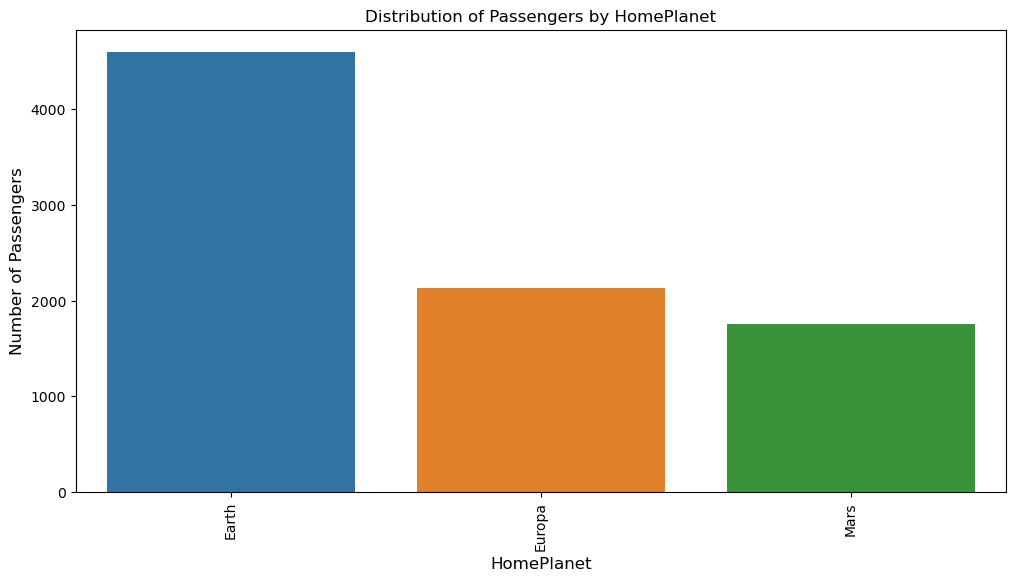

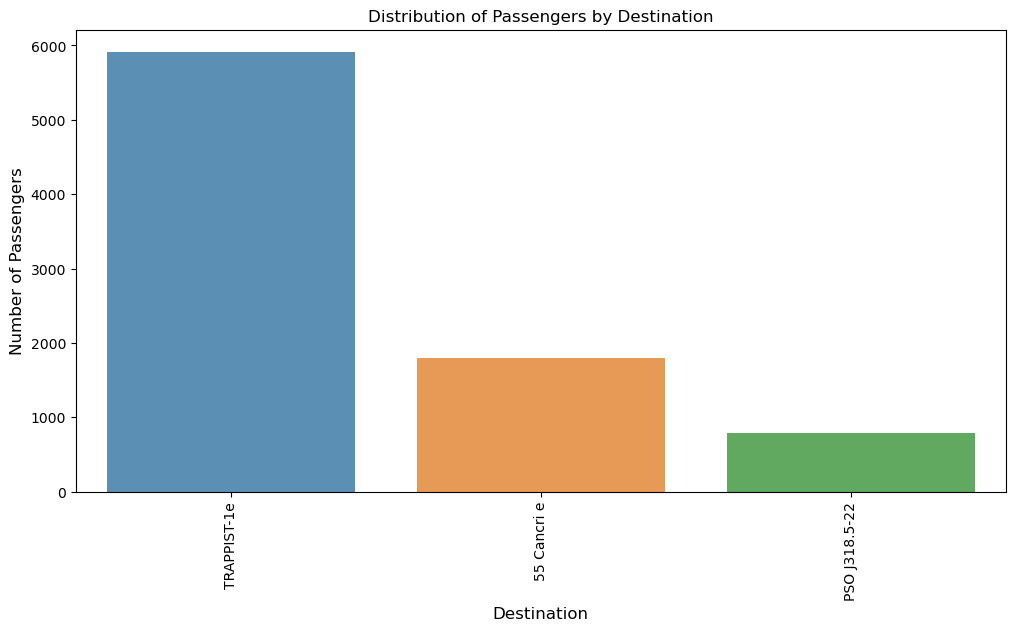

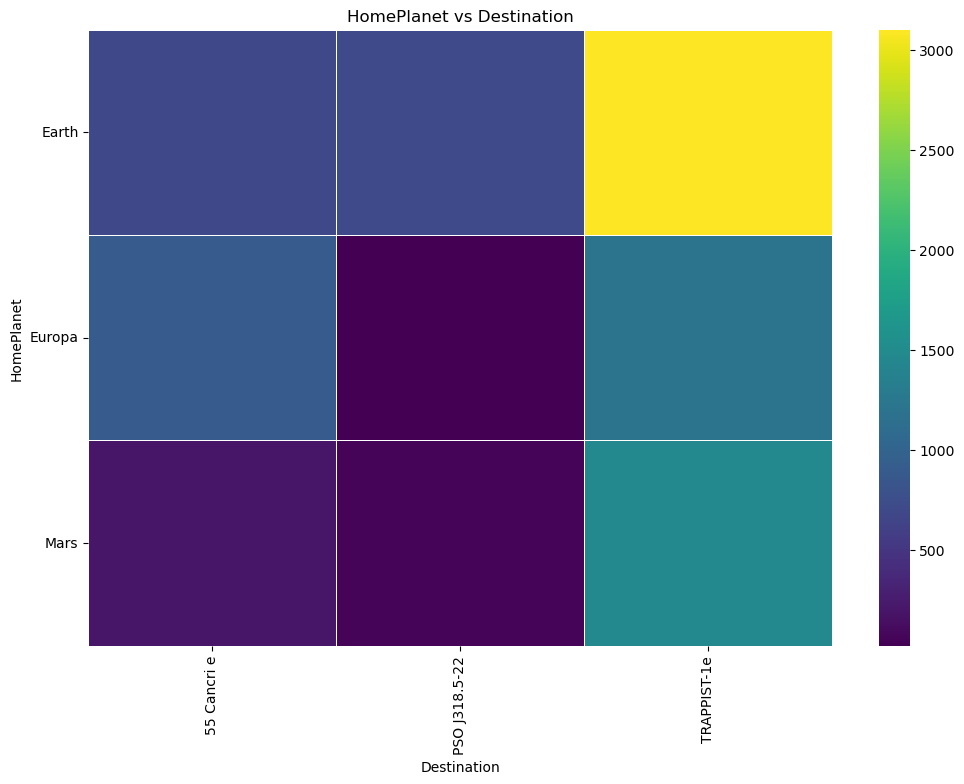

In [770]:
#1 What is the distribution of passengers across different HomePlanets and Destinations? Are there any popular planets?

#First we count number of passengers by HomePlanet
homeplanet_counts = train_data_space["HomePlanet"].value_counts()

#Then we plot a bar graph of HomePlanet counts 
plt.figure(figsize=(12, 6))
sns.barplot(data=train_data_space, x=homeplanet_counts.index, y=homeplanet_counts.values)
plt.title("Distribution of Passengers by HomePlanet")
plt.ylabel("Number of Passengers", fontsize=12)
plt.xlabel("HomePlanet", fontsize=12)
plt.xticks(rotation=90)
plt.show()

#Then Count number of passengers by Destination
destination_counts = train_data_space["Destination"].value_counts()

#Then we plot a bar graph of Destination counts
plt.figure(figsize=(12, 6))
sns.barplot(data=train_data_space, x=destination_counts.index, y=destination_counts.values, alpha=0.8)
plt.title("Distribution of Passengers by Destination")
plt.ylabel("Number of Passengers", fontsize=12)
plt.xlabel("Destination", fontsize=12)
plt.xticks(rotation=90)
plt.show()
## Look for crosscorrelations between home and destination
crosstab = pd.crosstab(train_data_space["HomePlanet"], train_data_space["Destination"])

# To better visualize this, we can use a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, cmap="viridis", linewidths=.5)
plt.title("HomePlanet vs Destination")
plt.xlabel("Destination")
plt.ylabel("HomePlanet")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
## Look for crosscorelation between home planet and destination and taking the transported property into account in terms of the home planet
pd.crosstab([train_data_space["HomePlanet"], train_data_space["Transported"]],train_data_space["Destination"]).style.background_gradient(cmap="viridis")



## Answer to research question 1: 
What is the distribution of passengers across different HomePlanets and Destinations?  Did the transportation depend on the home planet ?

From just looking at the first two bar charts we can see that most passengers come from earth, secound most from the Jupiter moon Europa and third most from Mars. It seems that those are up to that date the only planets and moons that are populated and where the people are on the space journey. From the secound bar chart we can see thaat TRAPPISTE-1e is the planet chosen from most passengers as destination , 55 Cancri e is chosen  secound most as destination and PSO J318.5-22 as third most destination. It seems those three planets haave been investigated in previous missions and decided to be very habitable. 

From the first cross correlation table, we can  clearly see that Passengers that are from earth  and marsreally like to got to the TRAPPISTE-1e system which is probably due to similar conditions in terms of gravity, atmosphere and so on. The passengers from Europa tend to chose the 55 Cancri e as their destination maybe due to similar reasons. 

When looking at the secound heatmap, where the transported is included, we see that from earth the number of proportion of successfully transported over total transported people to TRAPPIST-1e is 38% to PSO J318.5-22 is  is 49 % and  to 55 Cancri e is 50%. The same proportion from Europa to TRAPPOST-1e is 63% , from Europa to PSO J317.5-22 is 73% and from Europa to 55 Cancri e is 68%. The same proportion from Mars to TRAPPOST-1e is 51% , from Mars to PSO J317.5-22 is 44% and from Europa to 55 Cancri e is 61%. So it seems that from Earth the successfully transported paassengers to TRAPPIST -1e haas the lowest proportion, while in general the successfully transported proportions from earth are smaller compaared to the other homes, we can assume that probably people from earth are not used to space travel such as people which aare already living on other planets or moons and thus are more likely to die. The proportions from passengers from europa getting transported are the highest which seems thaat they are used already to travel in harsh conditions. Passengers from mars are in the middle in terms of the proportion successfully transported. 

## Question 2

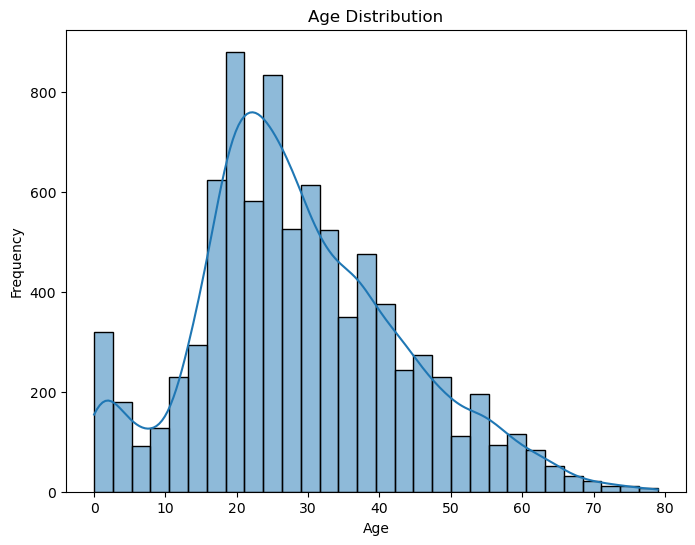

Number of young passengers (<30): 4920
Number of old passengers (>60): 220
Average age: 28.82793046746535
Transported
False    29.922858
True     27.748834
Name: Age, dtype: float64
Transported
False    79.0
True     78.0
Name: Age, dtype: float64


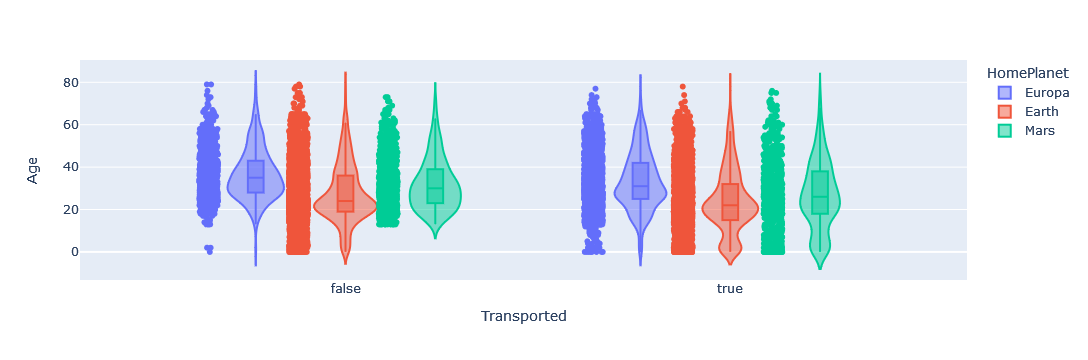

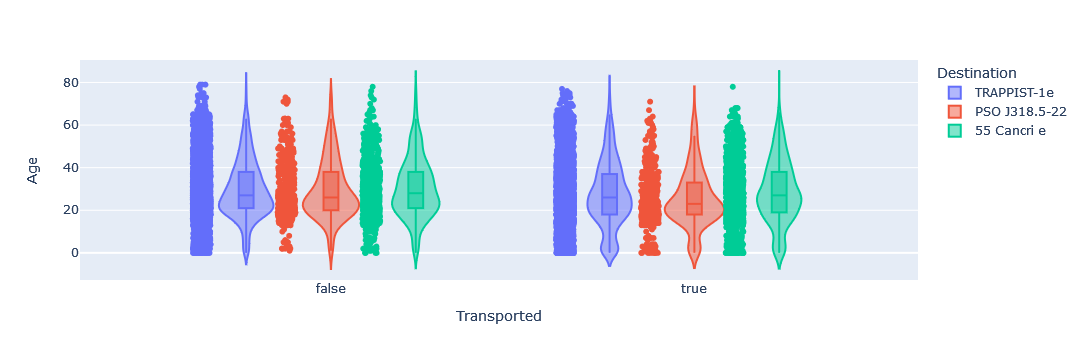

In [771]:
#How are the Age values distributed? Are there more young or older passengers? What is the average age? and how does the age depend on the transported status, the home and the destination?

# How are the Age values distributed?
plt.figure(figsize=(8, 6))
sns.histplot(train_data_space["Age"].dropna(), kde=True, bins=30)  # dropping NA values for visualization
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Are there more young or older passengers?
# Define "young" as <30 and "old" as >60
young_passengers = len(train_data_space[train_data_space["Age"] < 30])
old_passengers = len(train_data_space[train_data_space["Age"] > 60])
print(f"Number of young passengers (<30): {young_passengers}")
print(f"Number of old passengers (>60): {old_passengers}")

# What is the average age?
average_age =train_data_space["Age"].mean()
print(f"Average age: {average_age}")

# Average age by transported status
average_age_by_status = train_data_space.groupby("Transported")["Age"].mean()
print(average_age_by_status)

# Max age by transported status

max_age_by_status = train_data_space.groupby("Transported")["Age"].max()
print(max_age_by_status)

# Look at the age pyramid in dependence of homeplanet and if transported
df=px.data.tips()


fig=px.violin(train_data_space, y="Age", x="Transported", box=True, points="all", color="HomePlanet", hover_data=train_data_space.columns)

fig.show()

# Look at the age pyramid in dependence of destination and if transported

df2=px.data.tips()
fig2=px.violin(train_data_space, y="Age", x="Transported", box=True, points="all", color="Destination", hover_data=train_data_space.columns)

fig2.show()

## Answer to research question 2: 
#How are the Age values distributed? Are there more young or older passengers? What is the average age? and how does the age distribution depend on the transported status, the home and the destination?

### How are the Age values distributed?

One can see form the bar plot containing the number of the passenger dependening on the age that there is a comparable high number between 0 and 5 which means many newborns and small children are on the ship. Then there is a decrease in the frequency around 8-10 years. The peaks are around 20 years and 26 years  which means that people in this age are most probaly withstanding spacetravel conditions the best. Then the frequency is sinking again respresenting the age pyramid a little of a not-overaged civilzation.


### Are there more youn or older passengers?

Here we look for the number of passenger with an age below 30 years and above 60 years, where we have 220 above 60 and 4920 people  below thirty so definitely more young passengers. 

### What is the average aage (in terms of transportation status)

Here the mean age for the people not transported is 29.92 years and for people transported 27.74 years. The maximum age for people not transproted is 79 years and transported 78 years

### how does the age distribution depend on the transported status, the home and the destination?

When looking at the age pyramids depending on the home planet we can see that the median of the pyramid is very compaarably high for Europa and comparably low for Mars, which could probably mean, that there are not so much newborns on Europa due to harder survial conditions. Furthermore we see thaht there is a distinct stronger peak in ther pyramid of Europa and Mars which can be a hint that those people were starting the colonialization on the planet. The earth as a broader distribution. What is noteworthy in dependence of the age with respect to transpotaion and homeplanet is that the children below 20 are more likely to be  transported independent of the homeplanet and that the people from earth between 20 and 40 are a little less likely to be transported.

Depending on the desitnation, the distribution reflecting the observations that many from earth are going to TRAPPISTE-1e but also that there are some intermixings. However it seems the distribution are more equally distributed. More people around 20-30 are going to the PSO J318.5-22 . And young people are also again more likely to get transported more or less independent on the destination. 


Important is here to mention that possible empty vaalues are maybe interpreted in the age since the cleaning process will happen before the ML part


## Question 3

In [772]:
#How is the deck ocupation and the side ocupation and how many are cryosleep? Is there a relationship between CryoSleep and Cabin variables? Does the cabin location affect the choice to go into cryosleep? and how does the transported vaariaable affect both the cabin and cryo sleep




Answering this question might be a bit tricky because the "Cabin" variable is categorical and likely has many unique values. However, we can still attempt to find patterns. Since "Cabin" takes the form "deck/num/side", but it is already splitted 

We"ll examine the distribution of "CryoSleep" across "Deck" and "Side" to see if there"s a noticeable pattern. We"ll also create crosstabs to see how "Transported" status relates to "CryoSleep" and "Deck".

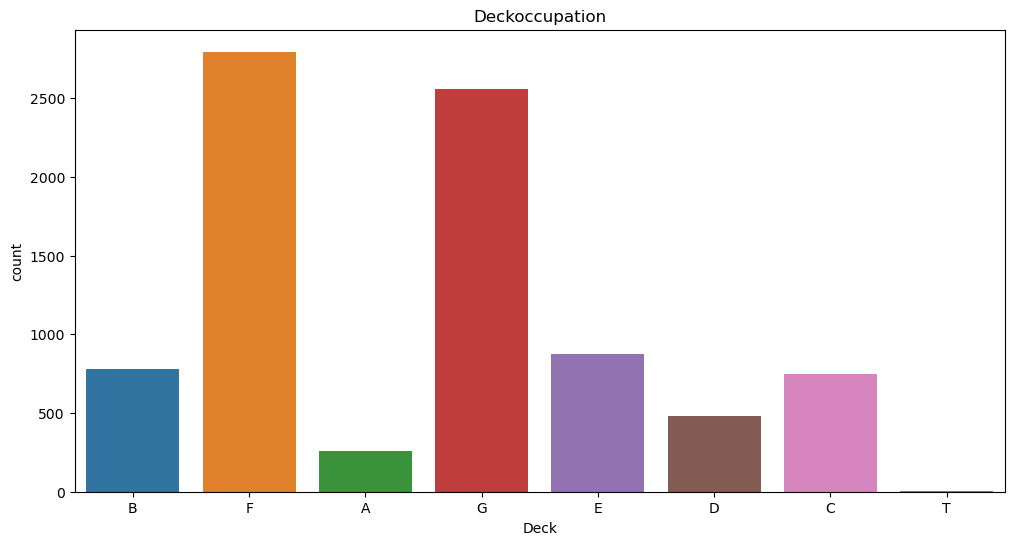

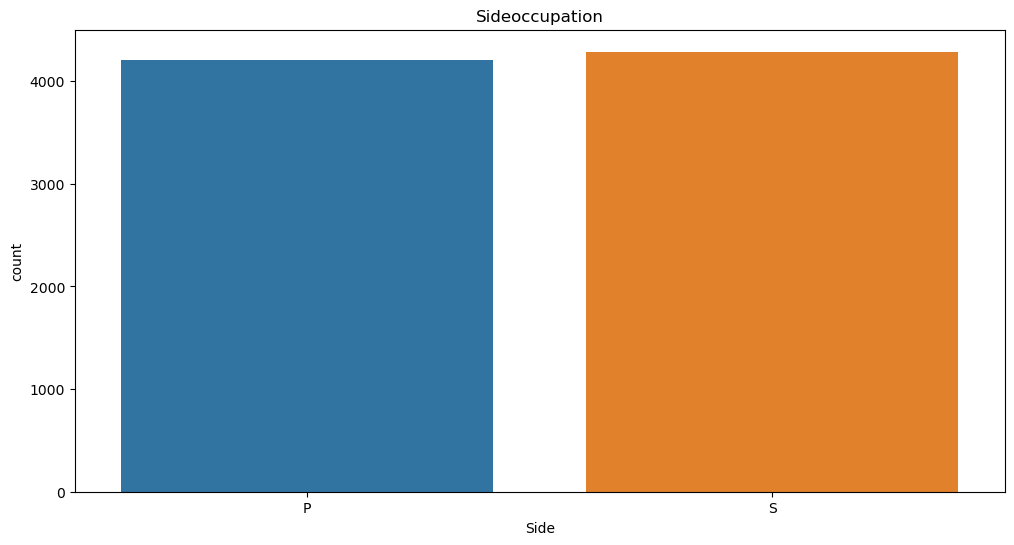

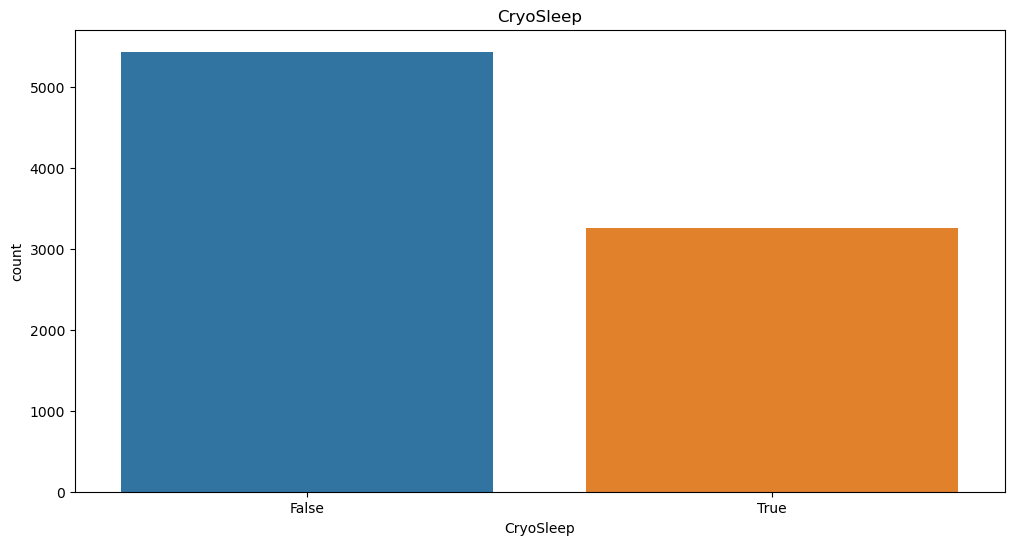

IN_Cryo_sleep: 3254
NO_Cryo_sleep: 5439


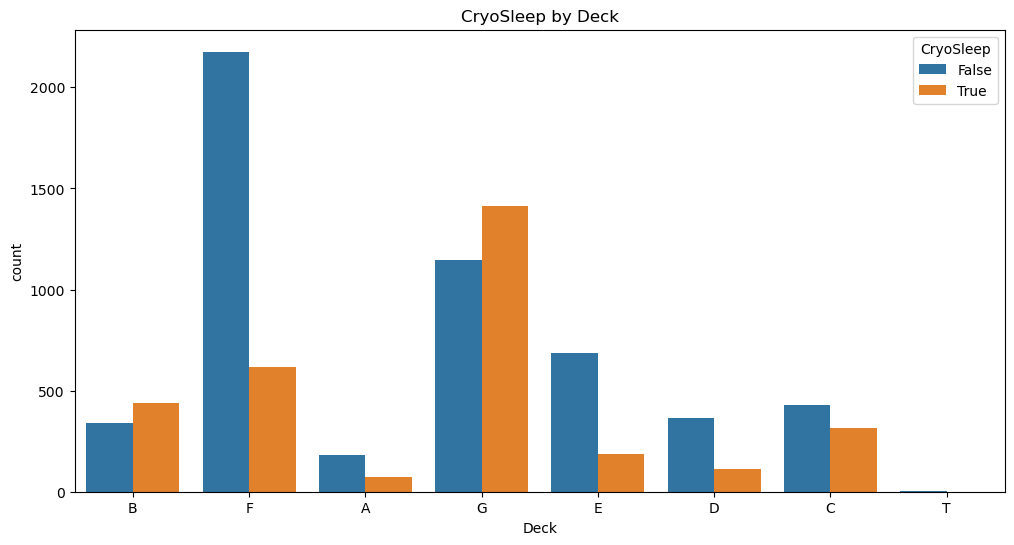

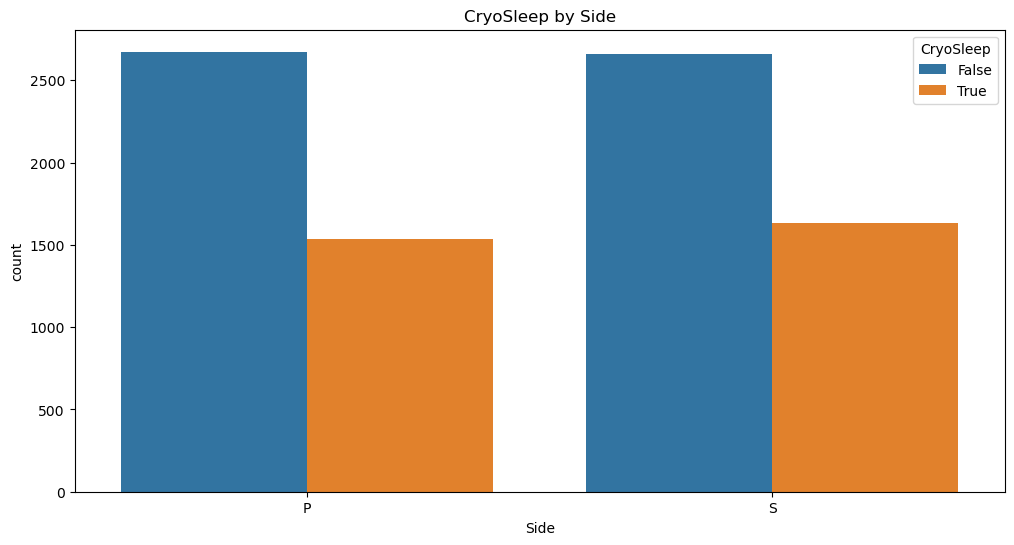

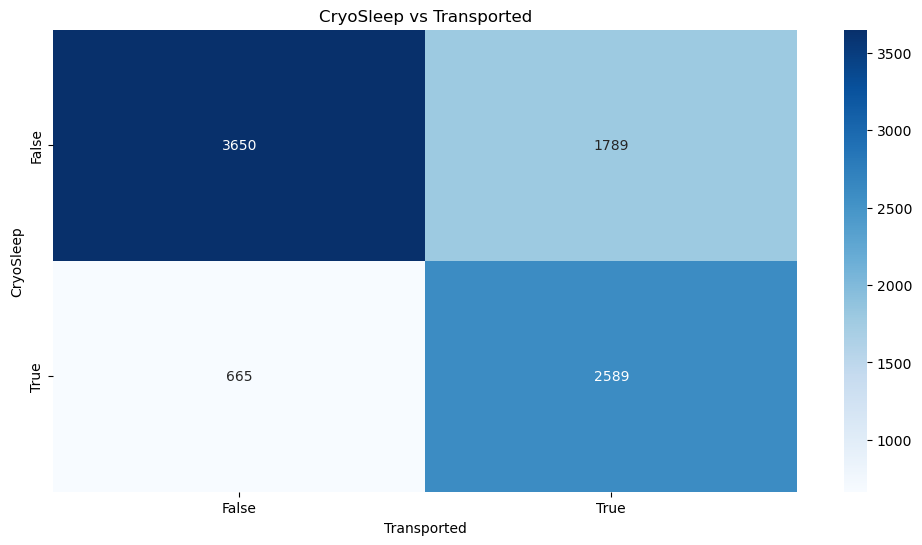

In [773]:
# Distribution Deck/Side 

plt.figure(figsize=(12,6))
sns.countplot(data=train_data_space,x="Deck")
plt.title("Deckoccupation")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=train_data_space,x="Side")
plt.title("Sideoccupation")
plt.show()
#Cryosleep?
plt.figure(figsize=(12,6))
sns.countplot(data=train_data_space,x="CryoSleep")
plt.title("CryoSleep")
plt.show()


Cryo_sleep_passengers = len(train_data_space[train_data_space["CryoSleep"] == True])
No_cryo_sleep_passengers = len(train_data_space[train_data_space["CryoSleep"] == False])
print("IN_Cryo_sleep:",Cryo_sleep_passengers)
print("NO_Cryo_sleep:",No_cryo_sleep_passengers)
# Relationship between CryoSleep and Deck/Side
plt.figure(figsize=(12, 6))
sns.countplot(x="Deck", hue="CryoSleep", data=train_data_space)
plt.title("CryoSleep by Deck")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x="Side", hue="CryoSleep", data=train_data_space)
plt.title("CryoSleep by Side")
plt.show()

# Crosstab between CryoSleep/Deck and Transported
crosstab_cryosleep = pd.crosstab(train_data_space["CryoSleep"], train_data_space["Transported"])


plt.figure(figsize=(12, 6))
sns.heatmap(crosstab_cryosleep, annot=True, cmap="Blues", fmt="d")
plt.title("CryoSleep vs Transported")
plt.show()

pd.crosstab([train_data_space["CryoSleep"],train_data_space["Transported"]], train_data_space["Deck"]).style.background_gradient(cmap="Blues")

## Answers to question 3
### How is the deck occupation and the side occupation and how many are cryosleep? 

The decks F and G are occupied the most and A and D the least the others are also not occupied that much compared to F and G.

Concerning Side, there is nearly 50% , 50% distribution between port and starboard.

Concerning Cryo_sleep, there are 5439 not in the Cryosleep and 3254 in te Cryosleep.

So there are only 37 % in Cryosleep.

### Is there a relationship between CryoSleep and Cabin variables?

So there is a relationship between Deck and the Cryosleep status, most people in F are not in Cryostatus and in G slightly more people are in cryo than not in cryo. For the other decks except for B, where it is the other way round, a higher proportion is not in Cryosleep than in Cryosleep.

### Does the cabin location affect the choice to go into cryosleep?

Actually not because in both sides more people are not in cryo than in cryo and it is nearly equally for both sides


### How does is the transported vaariaable affected both  by the cabin and cryo sleep

The number of people how were not in cryo and not transported is 3650 which is 41% of all passengers , the number of people being in cryo and ntransported is 2589 (29 %) and the number which are transported and not in cryo is 1789 (20%) and which were not transported and in cryo is 665 (10%)

So without knowing the age of the people and the homeplanet, we can conclude that if you are not in cryosleep there is a quite high chance that you are not transported, furthermore there is a quite low number that was in cryosleep and not transported during the accident with spacetime so its very unlikely that you are not transported when you are in cryo. The proportions of being transported and being in cryosleep and being transported and not in cryosleep are quite similar but however it is moe likely to be transported when in cryosleep. So one can conclude it is recommended to be in Cryosleep in such an incidence if the target is to be transported.

When looking now at the deck in the last figure. The trend explained is in most decks visible however E,F,G and T differ. In E and F the number of passengers in Cryo and transported is lower than not in cryo and transported. In G the number of being transported and in Cryosleep is higher than not being transpored and not in Cryo and which is very remarkable. The number of people being in Cryo and not transported is higher and than being not in cryo and transported

### So the next question is whether how the age influences the cabin and the cryo

## Question 4

                  Age  CryoSleep  Transported
Age          1.000000  -0.073771    -0.075026
CryoSleep   -0.073771   1.000000     0.451744
Transported -0.075026   0.451744     1.000000


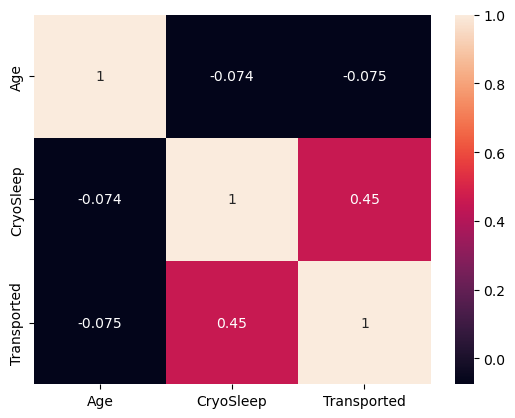

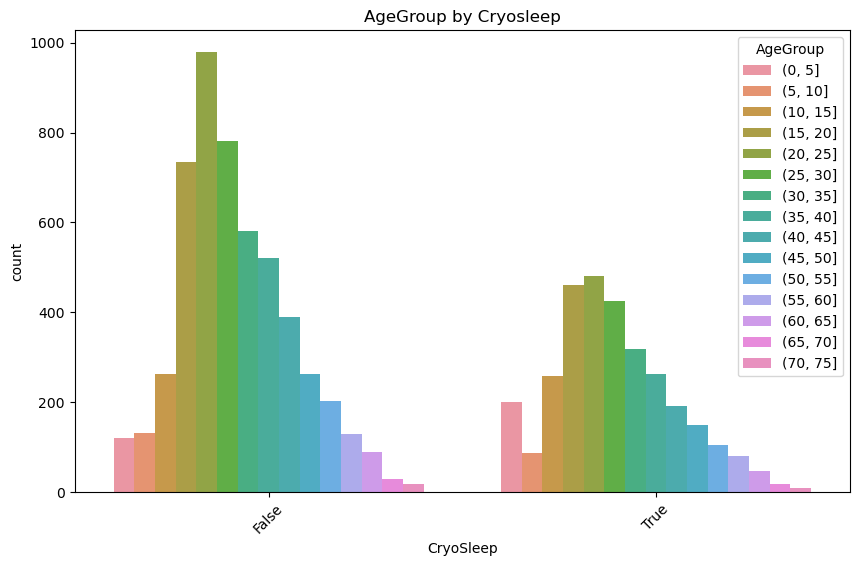

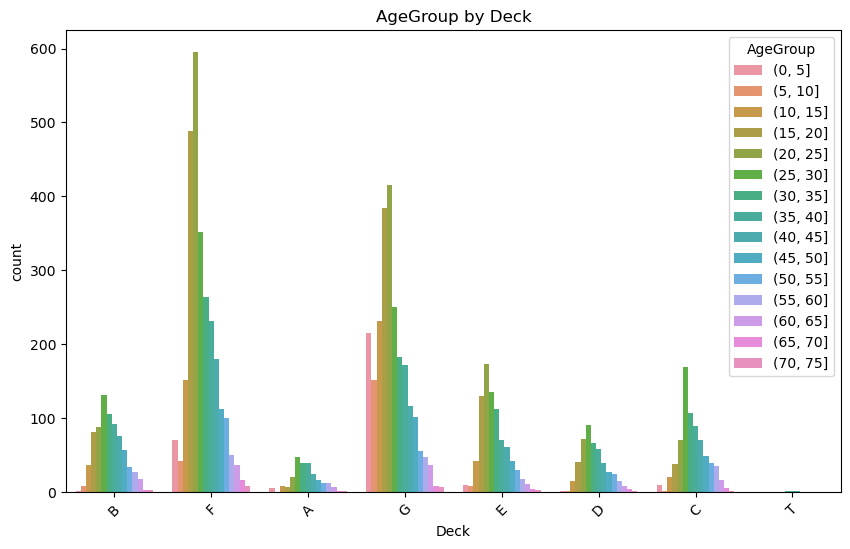

In [774]:
# How does the age affect the variable being in CryoSleep and how does the age affect the 
#choice of Deck in the cabin variable all together with being transported --> Croscorrelation

# Check crosscorrelation
train_age_cryo_cabin = train_data_space[['Age','CryoSleep','Transported']]

print(train_age_cryo_cabin.corr())
sns.heatmap(train_age_cryo_cabin.corr(),annot=True)

# Bin the age value into agegroups of 5
train_data_space['AgeGroup'] = pd.cut(train_data_space['Age'], bins=range(0, 80, 5))

# Relationship between CryoSleep and AgeGroup
plt.figure(figsize=(10, 6))
sns.countplot(x='CryoSleep', hue='AgeGroup', data=train_data_space)
plt.title('AgeGroup by Cryosleep')
plt.xticks(rotation=45)
plt.show()


# Relationship between AgeGroup and Deck/Side
plt.figure(figsize=(10, 6))
sns.countplot(x='Deck', hue='AgeGroup', data=train_data_space)
plt.title('AgeGroup by Deck')
plt.xticks(rotation=45)
plt.show()


## Answers to question 4

### Crosscorrelation

We can see a  positive crosscorrelation between cryosleep and transported as predicted by the last question and we can see slight anticorrelations between age and transported and age and  Cryosleep

###  Agegroup by Cryosleep

We group the ages in agegroups of 5 and we can see then in the plot that there are two remarkable points. On the one side, comparably more passengers between 0 and 5 are in the Cryosleep which means that here we can expect that this is also the reason why they are more likley to get transported in the incidence at least to some extend and this makes also sence to put children which are may not survive otherwise into cryosleep if they see the event coming. Furthermore we see that the number of people between 20 and 25 and also a beit between 25 and 30 that are not in Cryosleep is comparably high in the overall age distribution.

### Agegroup by Deck 

We see that there are especially the young passengers between 0 and 5  and also between 5 anf 10 in Deck B which may leads to the transport outlier in question 3 when assuming especially younger passengers are overall more likely to get transported. In Deck F and E, the number of passengers in the age which are not in the Cryo are higher which explains maybe aalso those outliers a bit in question 3

### Question 5

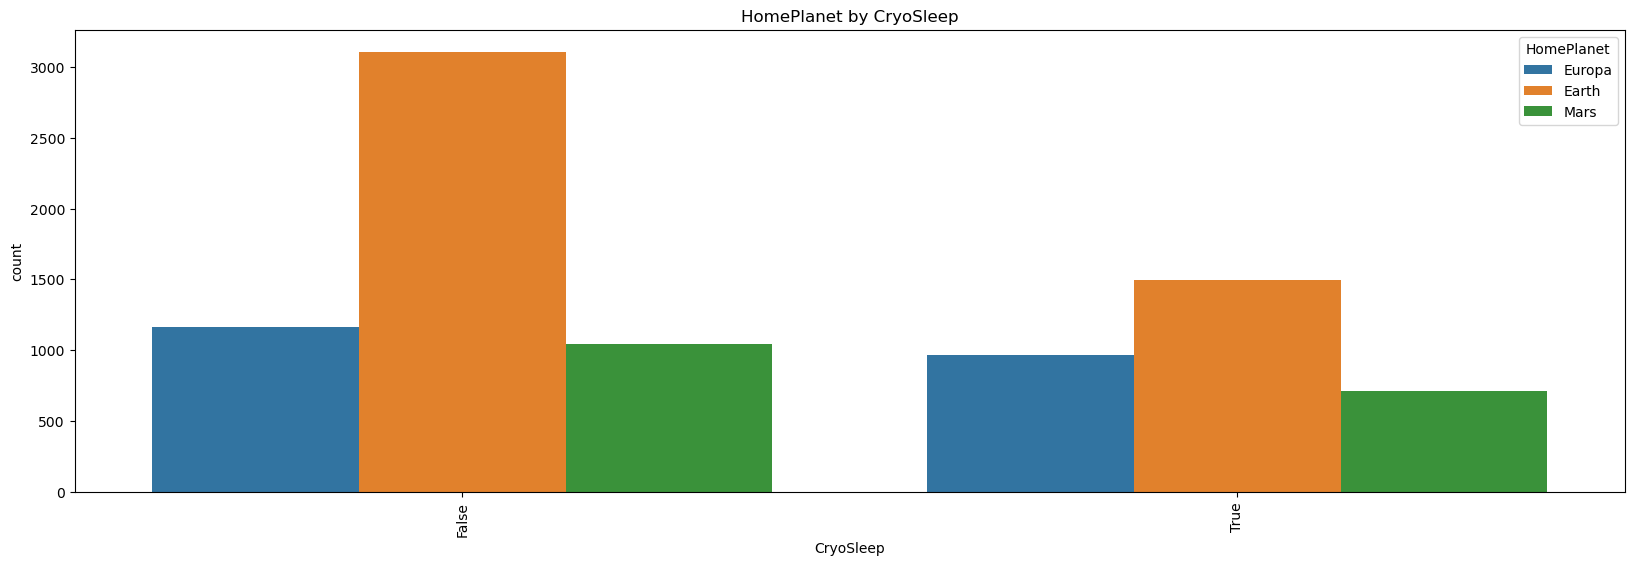

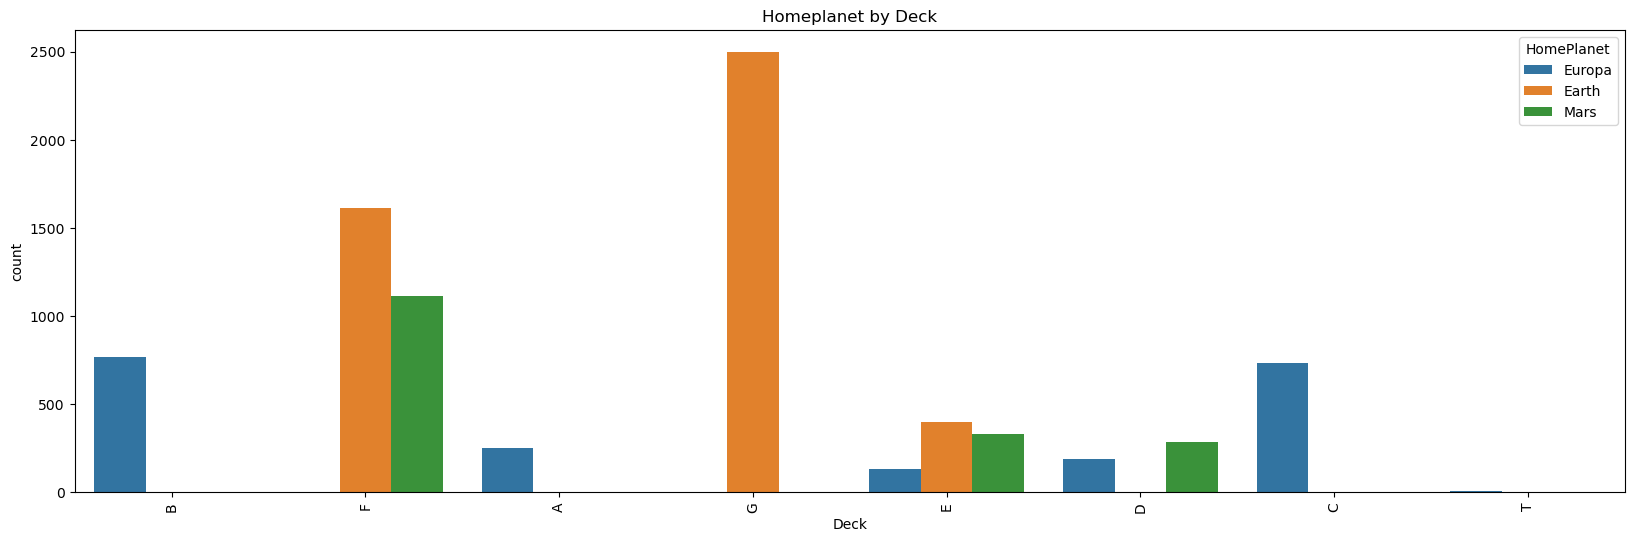

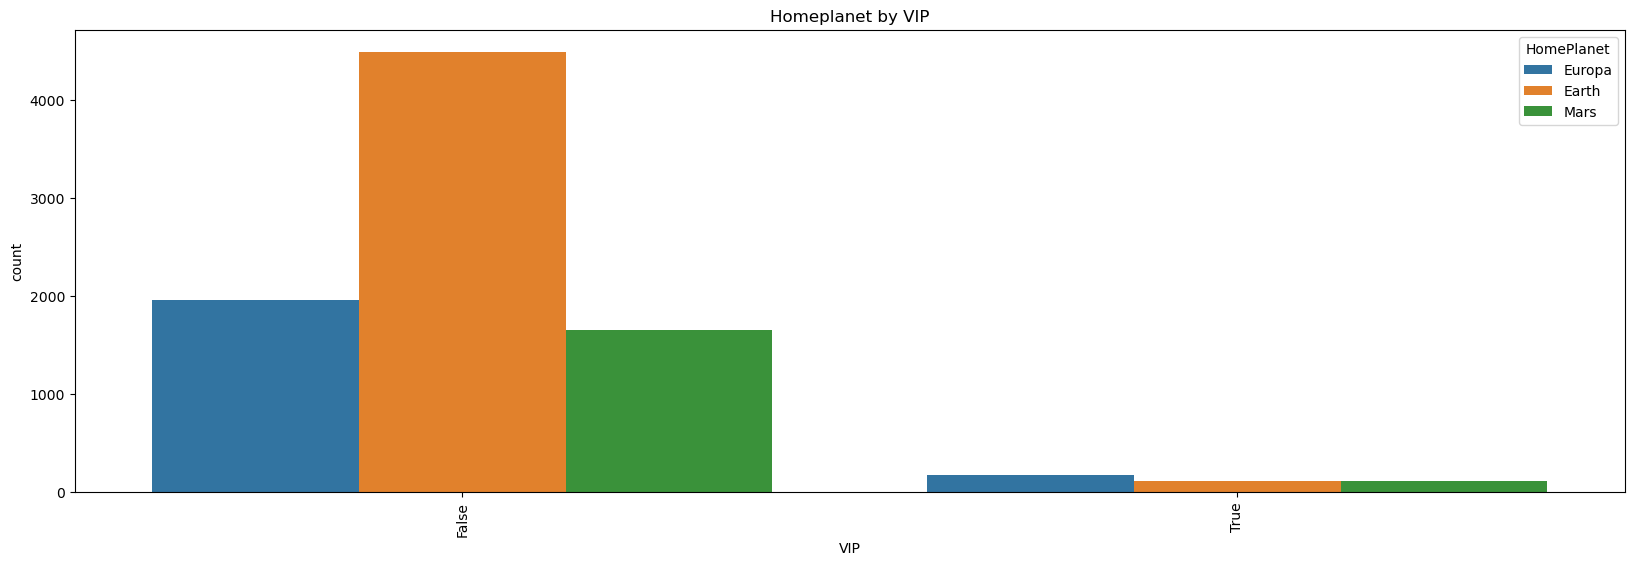

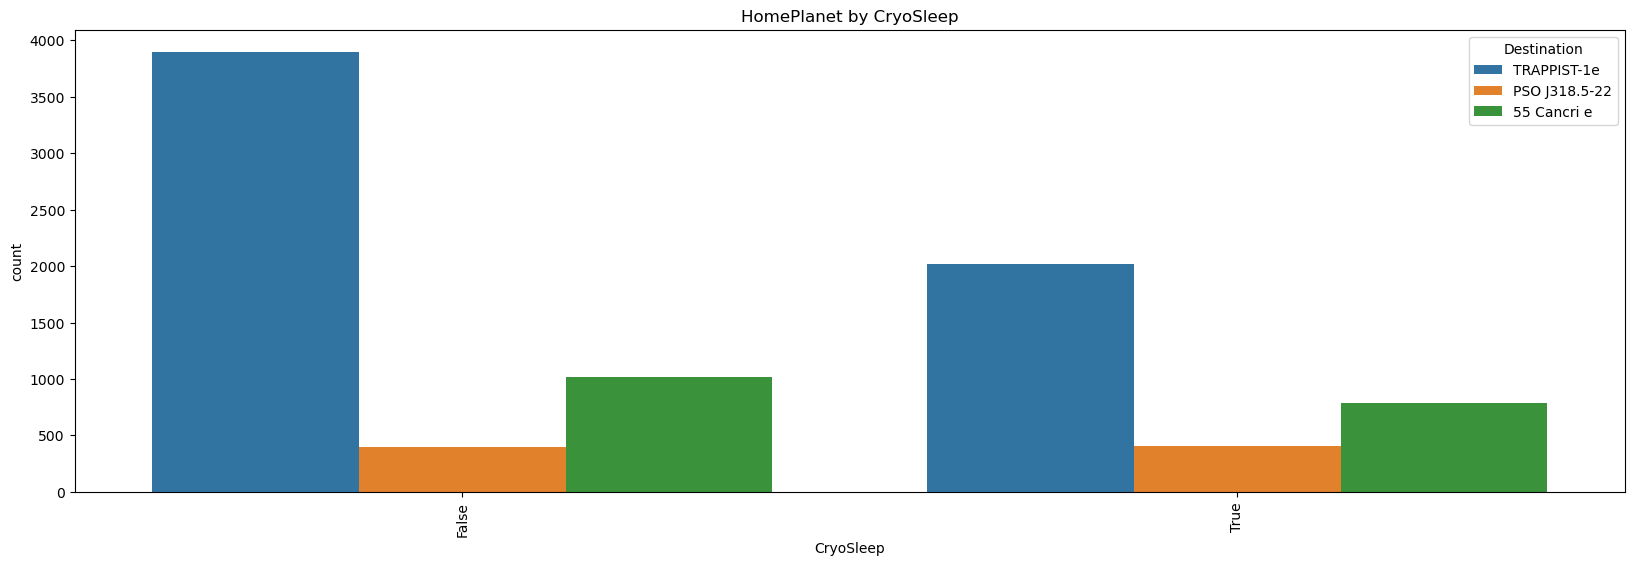

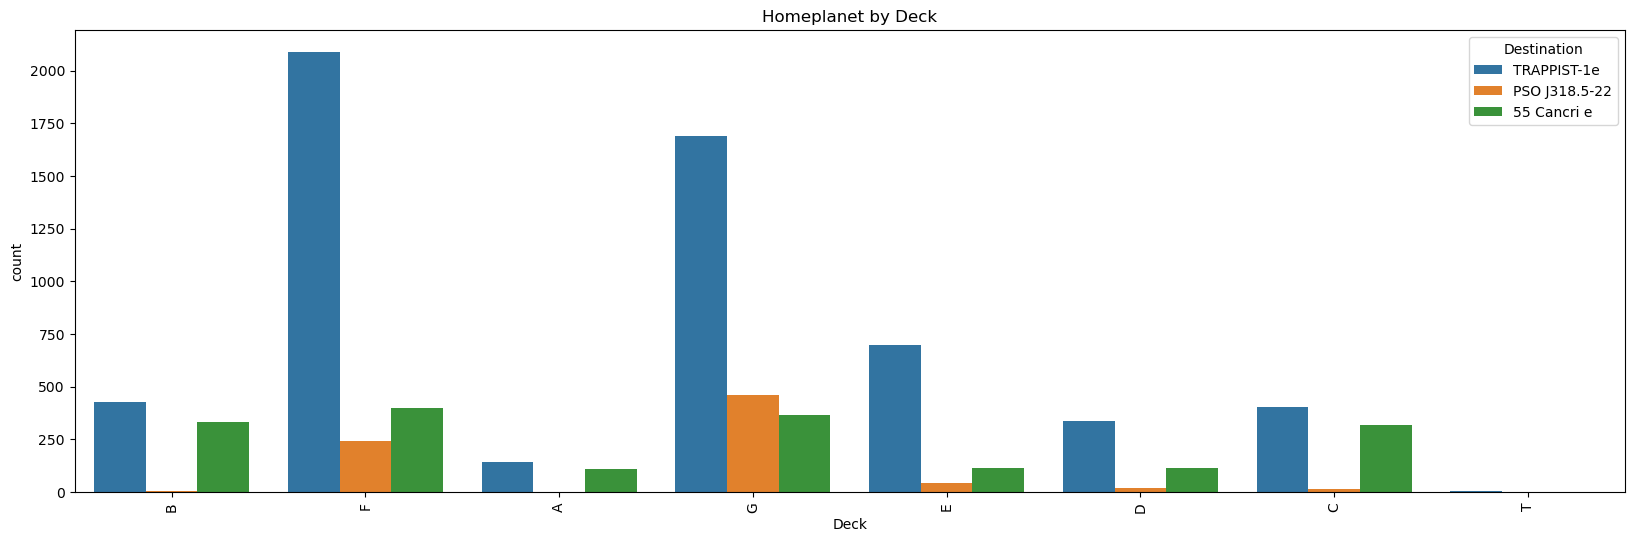

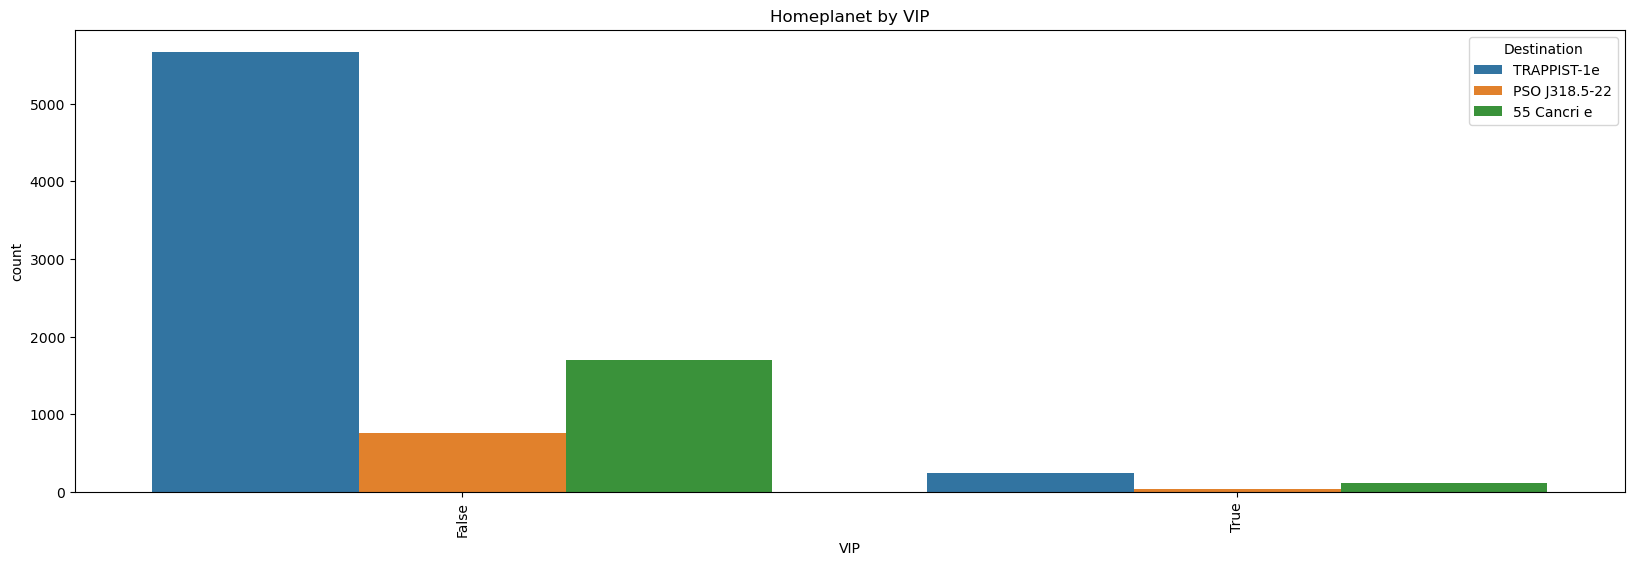

In [775]:
#How does the homeplanet and the destination affect the variable of being in cryosleep, the deck and the VIP status


#Homeplanet

# Check for Cryosleep
plt.figure(figsize=(20, 6))
sns.countplot(x='CryoSleep', hue='HomePlanet', data=train_data_space)
plt.title('HomePlanet by CryoSleep')
plt.xticks(rotation=90)
plt.show()

# Check for Deck
plt.figure(figsize=(20, 6))
sns.countplot(x='Deck', hue='HomePlanet', data=train_data_space)
plt.title('Homeplanet by Deck')
plt.xticks(rotation=90)
plt.show()

# Check for VIP
plt.figure(figsize=(20, 6))
sns.countplot(x='VIP', hue='HomePlanet', data=train_data_space)
plt.title('Homeplanet by VIP')
plt.xticks(rotation=90)
plt.show()

#Destination

# Check for Cryosleep
plt.figure(figsize=(20, 6))
sns.countplot(x='CryoSleep', hue='Destination', data=train_data_space)
plt.title('HomePlanet by CryoSleep')
plt.xticks(rotation=90)
plt.show()

# Check for Deck
plt.figure(figsize=(20, 6))
sns.countplot(x='Deck', hue='Destination', data=train_data_space)
plt.title('Homeplanet by Deck')
plt.xticks(rotation=90)
plt.show()

# Check for VIP
plt.figure(figsize=(20, 6))
sns.countplot(x='VIP', hue='Destination', data=train_data_space)
plt.title('Homeplanet by VIP')
plt.xticks(rotation=90)
plt.show()


##  Answer to question 5

### Homeplanet
It seems concerning CryoSleep that comparably more people from earth are not in CryoSleep , which is maybe due to the fact that more people from earth are in central which means that they probably could have more problems with CryoSleep for example. The difference is for the passengers from other planets not the case. A very interesting fact is the Deck correlation to the homeplanet ( Deck E,F,G --> here aare the t´people from earth) this could be also the reason for the cryo offests in question3. Mars are only in Deck D,E,F. The others contaain the people from Europa except for F and G. In terms of VIP it seems that passengers from Europa are comparably more under the people with VIP status compared relatively to other people

### Destination 

There are comparably significantly less people  in Cryosleep that go to TRAPPISTE-1e compared to people in CryoSleep, which could be due to the fact that the journey there is shorter than to the other planets. The ratio is nearly 50%/50% for the other planets. In Deck A and  B, only people from Europa which go to TRAPPIST-1e and 55 Cancri e are located. The correlation that people from earth go to the TRAPPIST-1e system is also visible. Concerning the VIP status there seems to be no special correlation

### Question 6

               Passengerid_1  Passengerid_2       Age  RoomService  FoodCourt  \
Passengerid_1       1.000000       0.011170 -0.009439    -0.000346  -0.009552   
Passengerid_2       0.011170       1.000000 -0.132756    -0.022571   0.023391   
Age                -0.009439      -0.132756  1.000000     0.068723   0.130421   
RoomService        -0.000346      -0.022571  0.068723     1.000000  -0.015889   
FoodCourt          -0.009552       0.023391  0.130421    -0.015889   1.000000   
ShoppingMall        0.017397      -0.038812  0.033133     0.054480  -0.014228   
Spa                -0.005211       0.016820  0.123970     0.010080   0.221891   
VRDeck              0.015432       0.010082  0.101007    -0.019581   0.227995   

               ShoppingMall       Spa    VRDeck  
Passengerid_1      0.017397 -0.005211  0.015432  
Passengerid_2     -0.038812  0.016820  0.010082  
Age                0.033133  0.123970  0.101007  
RoomService        0.054480  0.010080 -0.019581  
FoodCourt         -0

<Axes: >

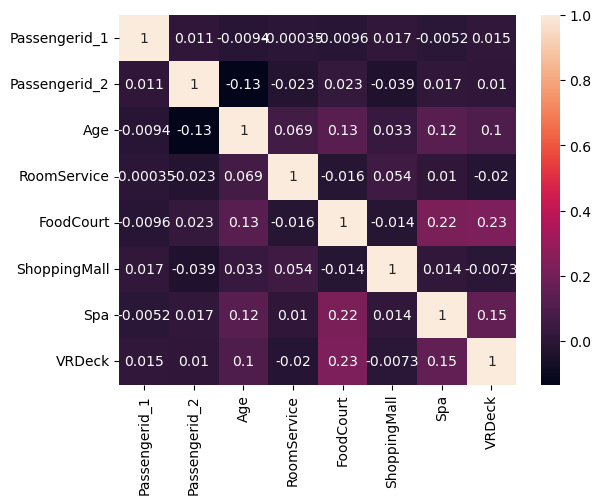

In [776]:
#Check as summary the correclation of the numerical  data

# look at numeric and categorical values separately 
train_num = train_data_space[['Passengerid_1','Passengerid_2','Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]

print(train_num.corr())
sns.heatmap(train_num.corr(),annot=True)


## Answer Question 6

There are some significant correlation between age and Roomservice, Foodcourt, Shoppingmall, SPa and VR Deck and als between Foodcourt and Spa aand VR Deck  as well as roomservice and shoppingmall and spa and VR Deck. So people with higher aage tend to book more extras on the journey and that there aare maybe special offers to more expensive services or people with more money tend to book all the services

# 5) Machine Learning classification -- Research question 7 -- Predict  who will be transported

## 5.1) Clean data

In [777]:
# First get again some infos about the traindata and testdata set
train_data_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Passengerid_1  8693 non-null   float64 
 1   Passengerid_2  8693 non-null   float64 
 2   HomePlanet     8492 non-null   object  
 3   CryoSleep      8693 non-null   bool    
 4   Deck           8494 non-null   object  
 5   Number         8494 non-null   object  
 6   Side           8494 non-null   object  
 7   Destination    8511 non-null   object  
 8   Age            8514 non-null   float64 
 9   VIP            8693 non-null   bool    
 10  RoomService    8512 non-null   float64 
 11  FoodCourt      8510 non-null   float64 
 12  ShoppingMall   8485 non-null   float64 
 13  Spa            8510 non-null   float64 
 14  VRDeck         8505 non-null   float64 
 15  First Name     8493 non-null   object  
 16  Family Name    8493 non-null   object  
 17  Transported    8693 non-null   bo

In [778]:
#train_data_space = train_data_space.drop(['RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck','Number'],axis=1)

Then rows containing still empty fields are dropped

In [779]:
train_data_space= train_data_space.dropna() 

In [780]:
#Check if Nan values are gonea
#print(train_data_space.isna().any(axis=1).sum() / train_data_space.shape[0] * 100 )
train_data_space.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6789 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Passengerid_1  6789 non-null   float64 
 1   Passengerid_2  6789 non-null   float64 
 2   HomePlanet     6789 non-null   object  
 3   CryoSleep      6789 non-null   bool    
 4   Deck           6789 non-null   object  
 5   Number         6789 non-null   object  
 6   Side           6789 non-null   object  
 7   Destination    6789 non-null   object  
 8   Age            6789 non-null   float64 
 9   VIP            6789 non-null   bool    
 10  RoomService    6789 non-null   float64 
 11  FoodCourt      6789 non-null   float64 
 12  ShoppingMall   6789 non-null   float64 
 13  Spa            6789 non-null   float64 
 14  VRDeck         6789 non-null   float64 
 15  First Name     6789 non-null   object  
 16  Family Name    6789 non-null   object  
 17  Transported    6789 non-null   bo

# 5.2 One Hot Encoding 
This method creates new (binary) columns in the dataset for each unique value in the categorical column. So, if you have a 'color' column that contains three categories ('red', 'blue', 'green'), one-hot encoding will result in three new columns ('color_red', 'color_blue', 'color_green'), each of which is a binary column that takes the value '1' if the original value was the respective color, and '0' otherwise.

   - Pros: It doesn't introduce arbitrary order in the data and can work well with any type of algorithm.
   - Cons: It can greatly increase the dimensionality of your data, especially if the categorical variable has many unique values. This can make your dataset much larger in memory, and can potentially decrease the performance of some machine learning algorithms.
   


In [781]:
# convert floats to to int 

train_data_space.Age=train_data_space.Age.astype(int)
train_data_space.RoomService=train_data_space.RoomService.astype(int)
train_data_space.FoodCourt=train_data_space.FoodCourt.astype(int)
train_data_space.ShoppingMall=train_data_space.ShoppingMall.astype(int)
train_data_space.Spa=train_data_space.Spa.astype(int)
train_data_space.VRDeck=train_data_space.VRDeck.astype(int)

In [782]:
# get predictors 
features_col=['HomePlanet', 'Destination','CryoSleep']
train_ds_space=train_data_space[features_col]

train_data_space_pred = pd.get_dummies(train_ds_space)
#get response
train_data_space_resp= train_data_space['Transported']

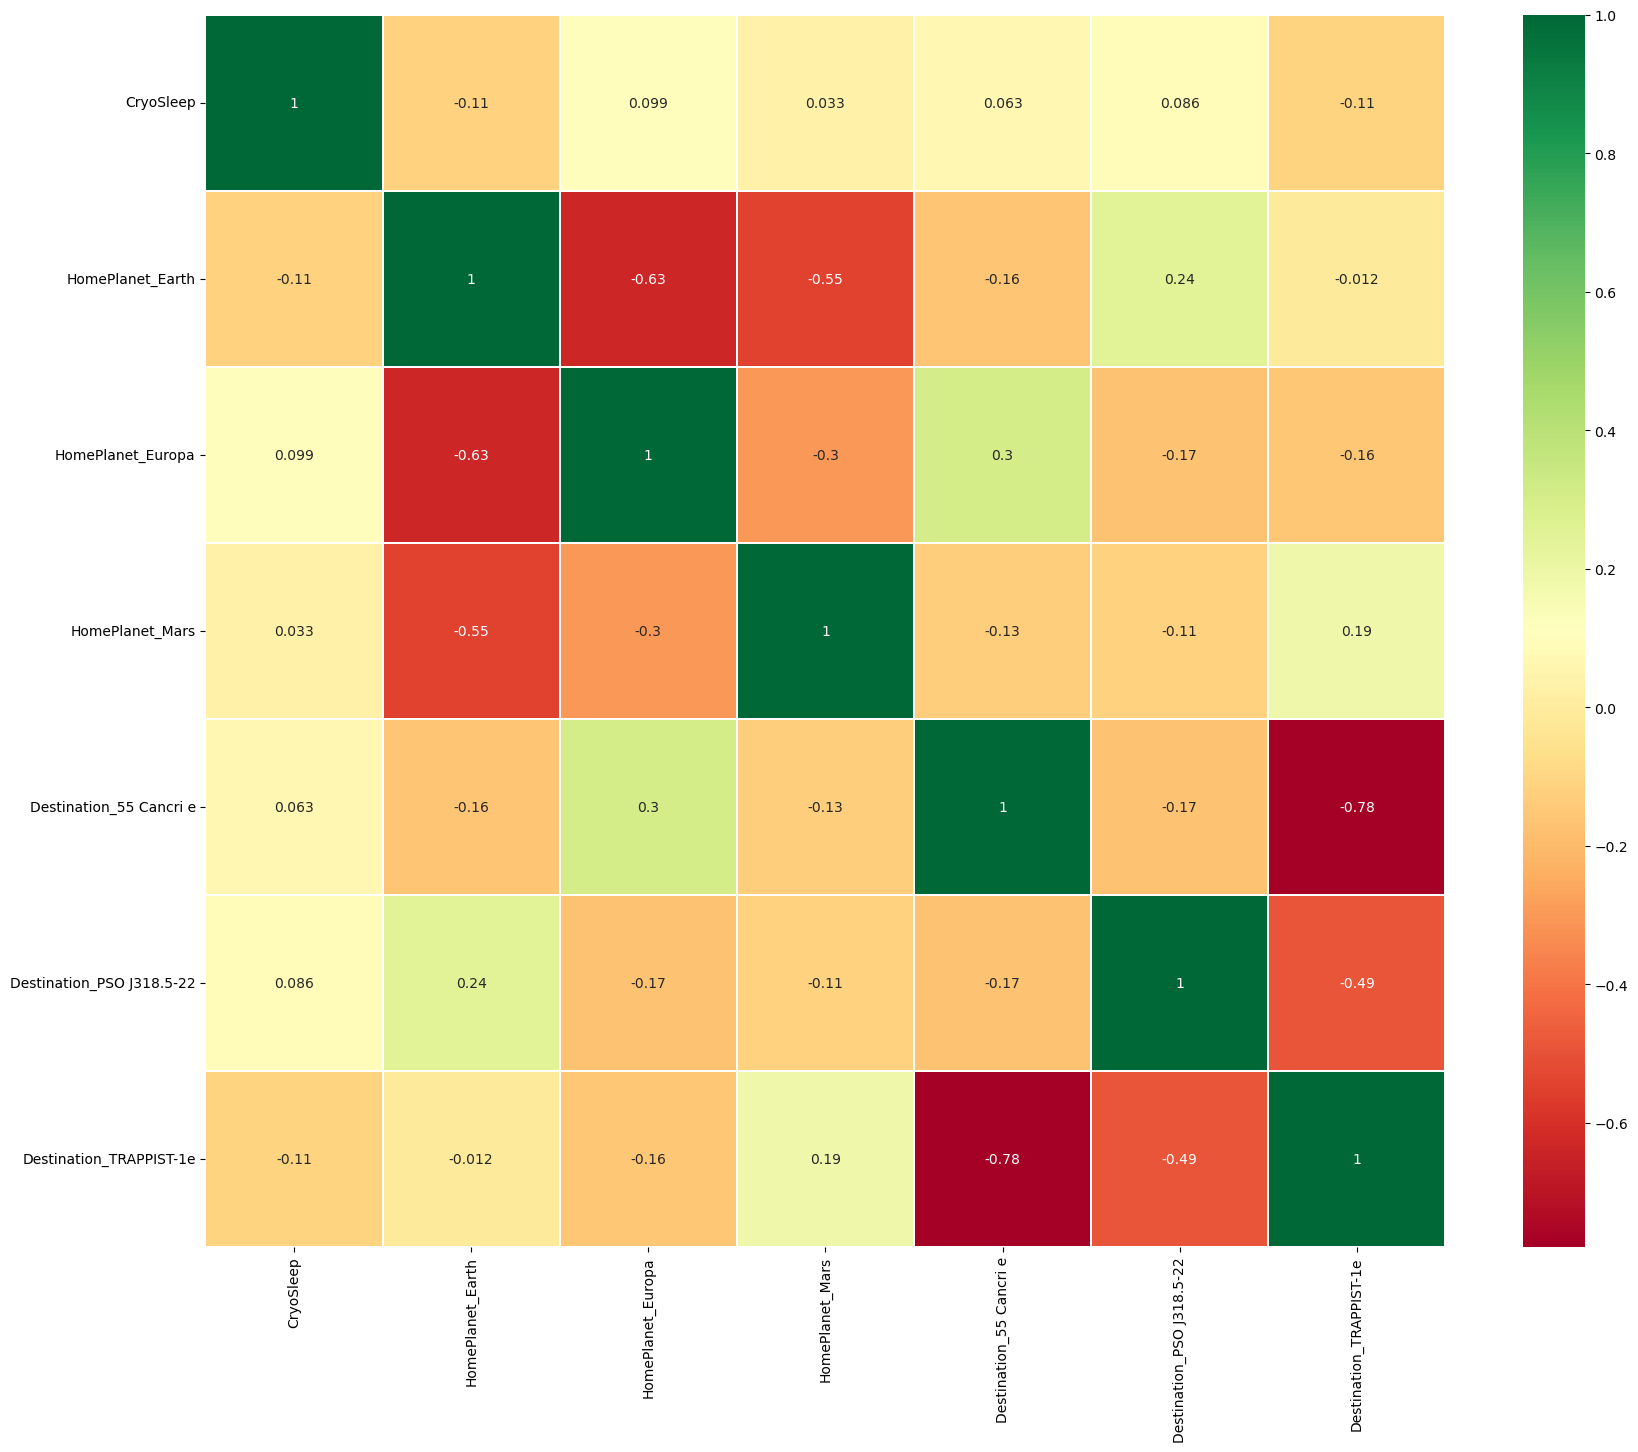

In [783]:
sns.heatmap(train_data_space_pred.corr(),annot=True,cmap='RdYlGn',linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(20,16)
plt.show()

# 5.3 Logisitc Model  

Create at first a train_test_split and then execute the fitting process and analye the metric. Logistic Regression is a good choice for the Transported target variable because it is a binary classification problem, meaning there are only two possible outcomes - either a passenger is transported to another dimension (True) or not (False).

Here are a few reasons why Logistic Regression is often used in such cases:

   - Binary Outcome: Logistic Regression is specifically designed to handle binary outcomes. It predicts the probability of the occurrence of an event by fitting data to a logistic function, making it a suitable model for binary classification problems.

 -   Probabilistic Interpretation: Logistic Regression not only gives a binary output, but it also estimates the probability of the event happening. This can be very useful when you are not just interested in the prediction, but also in how likely the prediction is to be true.

   - Simplicity and Efficiency: Logistic Regression is relatively simple and computationally efficient compared to more complex models, yet it can provide good performance in many scenarios.

 -   Robustness: Logistic Regression is less prone to overfitting and can handle noisy data well. It's also less affected by irrelevant features.

 -   Feature Importance: The coefficients in a logistic regression model are interpretable (given some transformation), allowing for an understanding of the impact of each feature on the odds of being Transported.

### Train/Test split taken from course notebook
- in ML, input data is split into train and test
- the first split is the training data, which is the initial reserve of data used to develop the the model (e.g. when building an email spam detector, then from the training data, false positives can be detected and also e.g.email notifications can be excluded)
- when a model is developed based on patterns extracted from the training data and we are satisfied with the performance of the model and the accuracy of its prediction, we can test the model on the remaining data (the test data)
- if we are satisfied with the model’s performance on the test data, than the model is ready set go
- the ratio is usually 80/20, unless if we have a large dataset then 90/10 is good
- before we split the data, we need to randomize the order (shuffling) to avoid potential bias in th data (ordered by date or alphabetically)
- random_state = can be any int value, ensures reproducibility of results on many runs (if you keep the number the same, but can be any). It will  ensure that the initial weights and biases of the model are initialized in the same way every time you train the model with the same dataset.

In [784]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data_space_pred, train_data_space_resp, test_size=0.2, random_state=42, shuffle=True)

In [785]:

# Assign algorithm
model = LogisticRegression(max_iter=1000)

# Link algorithm to X and y variables
model.fit(X_train, y_train)

# Run algorithm on test data to make predictions
y_pred = model.predict(X_test)

In [786]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('F1-score:', f1)


Accuracy: 0.7304860088365243
F1-score: 0.7284995540717384


## Answer Research question 7

The model, trained using 'HomePlanet', 'Destination', and 'CryoSleep' as input features, has an accuracy of approximately 0.73. This means that for about 73% of the passengers in the dataset, the model correctly predicted whether or not they were transported to another dimension during the Spaceship Titanic's collision with the spacetime anomaly.

The F1 score of the model is also approximately 0.73. The F1 score is the harmonic mean of precision and recall, which are two other metrics that help to give a more complete picture of a model's performance.

Precision refers to the proportion of true positive predictions (passengers correctly identified as being transported) out of all positive predictions (all passengers identified by the model as being transported). Recall, on the other hand, refers to the proportion of true positive predictions out of all actual positive cases (all passengers who were actually transported).

An F1 score of 0.73 suggests that the model has a good balance between precision and recall. It is correctly identifying a substantial proportion of the passengers who were transported, and of the passengers it identifies as transported, a substantial proportion of those predictions are correct.

The input features used to train this model are 'HomePlanet', 'Destination', and 'CryoSleep'. According to the Exploratory Data Analysis (EDA) performed on the dataset, these features have some correlation with whether a passenger was transported to another dimension. For instance, certain home planets or destinations may be more likely to have passengers who are transported. Similarly, whether or not a passenger chose to be put in cryosleep could also have an effect. Therefore, it makes sense to include these features in the model. However, there might be other features in the data that could also contribute to the prediction and improve the model's performance.

In conclusion, the model is performing reasonably well on the dataset with the given features. There's room for improvement and for further exploration of the data, but these results provide a promising starting point.

# Extra: Machine learning regression -- Research question 8: Predict the age of the passengers

In the Spaceship Titanic data set, we attempted to predict the age of passengers using the Linear Regression model. The features used in this model included the amounts billed at various amenities such as RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, along with the CryoSleep status of passengers.

However, predicting a passenger's age purely based on these features can be challenging. This is because a passenger's age might not have a straightforward or strong relationship with these variables. While it's plausible that younger passengers might spend differently on certain amenities compared to older passengers, or that the choice of going into CryoSleep might be influenced by age, these relationships are not necessarily strong or direct enough to predict age accurately.

Since the data preparaton steps like cleaningis already done, the fitting can start right away

In [787]:
train_data_space['Age'].fillna(train_data_space['Age'].median(), inplace =True)


In [788]:
# get predictors 
features_col=['RoomService','Transported','FoodCourt', 'Spa', 'VRDeck','VIP','CryoSleep']
train_ds_space_reg=train_data_space[features_col]

train_data_space_pred_reg = pd.get_dummies(train_ds_space)
#get response
train_data_space_resp_reg= train_data_space['Age']

# Split data into test/train set (80/20 split) and shuffle
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(train_data_space_pred_reg , train_data_space_resp_reg, test_size=0.2, random_state=42, shuffle=True)

# Assign algorithm
model = LinearRegression()
model.fit(X_train_reg, y_train_reg)

# Run algorithm on test data to make predictions
y_pred_reg = model.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print('Mean Absolute Error:', mae)
print('R-squared Score:', r2)

Mean Absolute Error: 11.007007392444828
R-squared Score: 0.07162511253511139


# Answer Resaerch question 8

In the context of the analysis, the Mean Absolute Error (MAE) of 11.007 suggests that on average, your model's predictions are approximately 11 years off from the actual age of the passengers. This can be considered quite high, especially when considering the range of possible ages.

The R-squared value of 0.0716 indicates that only about 7.16% of the variance in the Age is explained by the features included in your model ('RoomService', 'Transported', 'FoodCourt', 'Spa', 'VRDeck', 'VIP', 'CryoSleep'). An R-squared value close to 0 means that the model doesn't explain much of the variability of the response data around its mean, suggesting that the model isn't a very good fit for your data.

This outcome isn't surprising considering that the features included in the model don't intuitively have a strong or direct relationship with the Age of passengers. As a result, the model struggles to capture the underlying patterns linking these features with Age, leading to less accurate predictions and a lower R-squared score.

These results suggest that we need to revisit the drawing board and consider other features that could have a stronger relationship with Age, or possibly consider a different modeling approach entirely. It's also worth noting that Age could be a challenging variable to predict accurately based purely on the available data in the Spaceship Titanic dataset.

# Sources
## Data
- Titanic_challenge -- Course Advanced Programming
- Data-Science3_ML -- Course Advanced Programming
- Data-Science2_EDA -- -- Course Advanced Programming

## Online Sources

-https://www.kaggle.com/code/cavfiumella/spaceship-titanic-data-cleaning
-https://www.kaggle.com/code/hely333/eda-regression
## Tutorials

-https://www.youtube.com/watch?v=HReBjpi9dCY&t=1504s